# Project 6 : Buffer and intersection in Raster

##  Group 4 : Esfandiar_Babaii_Sharifi

### *Import required libraries*

In [181]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

### *Read our Polyline rasters*

In [182]:
raster_line2 = gdal.Open("line2_Raster.tif")
raster_line3 = gdal.Open("line3_Raster.tif")

### *Convert to array*

In [183]:
arr_line2 = raster_line2.ReadAsArray()
arr_line3 = raster_line3.ReadAsArray()

### *Plot our raster arrays*

Text(0.5, 1.0, 'Line 3')

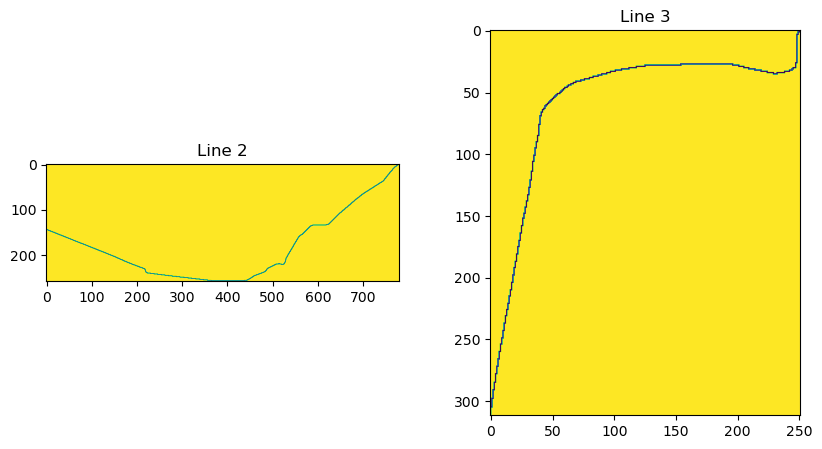

In [184]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) # Plot result
ax1.imshow(arr_line2,)
ax1.set_title('Line 2')
ax2.imshow(arr_line3,)
ax2.set_title('Line 3')

===============================================================================================

### *Show a clip of first array for find values*

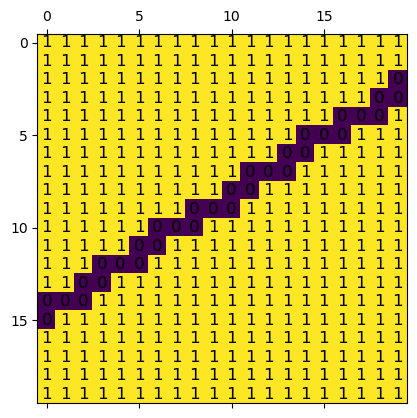

In [201]:
arr_temp = arr_line2[50:70,700:720]
fig, ax = plt.subplots()
ax.matshow(arr_temp,)
for (i, j), z in np.ndenumerate(arr_temp):
    ax.text(j, i, '{}'.format(z), ha ='center', va ='center', size = 12)

===============================================================================================

### *Create a Buffer around zero values(line 2)*

In [189]:
zero_indices = np.where(arr_line2 == 0)
buffered_line2 = np.ones_like(arr_line2)

for i, j in zip(*zero_indices):
    value = arr_line2[i, j]
    buffered_line2[i-4:i+4, j-4:j+4] = value

### *Plot our buffer's line 2*

Text(0.5, 1.0, 'Buffered Line 2')

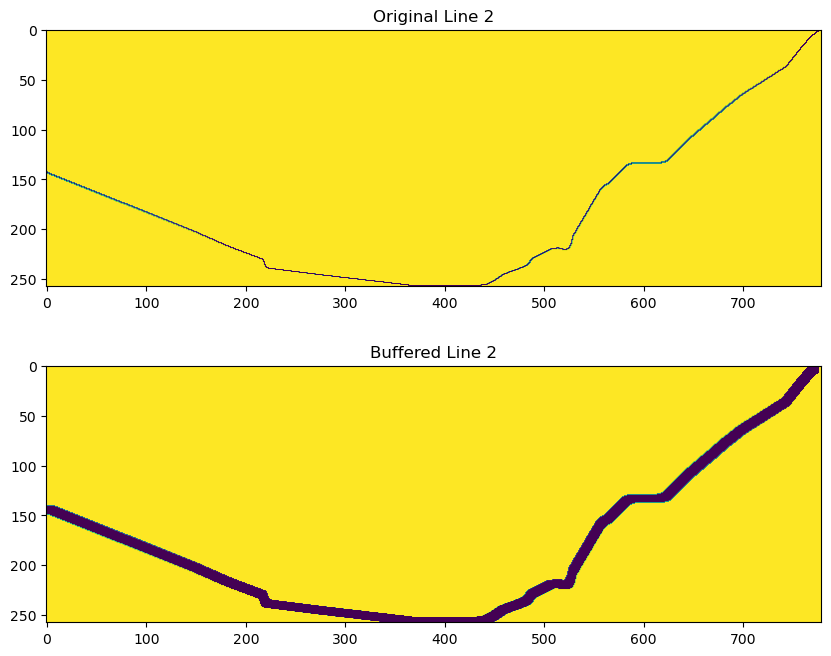

In [191]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8)) # Plot result
ax1.imshow(arr_line2)
ax1.set_title('Original Line 2')
ax2.imshow(buffered_line2)
ax2.set_title('Buffered Line 2')

===============================================================================================

### *Create a Buffer around zero values(line 3)*

In [192]:
zero_indices = np.where(arr_line3 == 0)
buffered_line3 = np.ones_like(arr_line3)

for i, j in zip(*zero_indices):
    value = arr_line3[i, j]
    buffered_line3[i-4:i+4, j-4:j+4] = value

### *Plot our buffer's line 3*

Text(0.5, 1.0, 'Buffered Line 3')

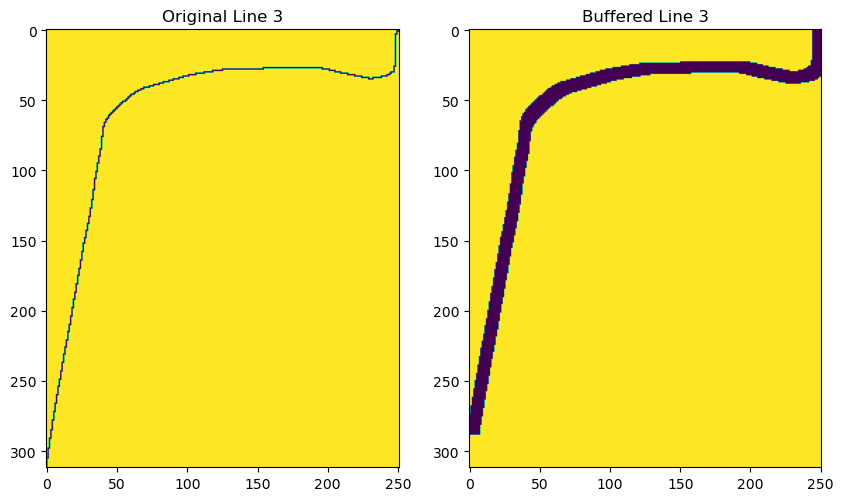

In [193]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8)) # Plot result
ax1.imshow(arr_line3)
ax1.set_title('Original Line 3')
ax2.imshow(buffered_line3)
ax2.set_title('Buffered Line 3')

===============================================================================================

### *Find intersection of our lines*

In [194]:
xmin = min(raster_line2.RasterYSize, raster_line3.RasterYSize)
ymin = min(raster_line2.RasterXSize, raster_line3.RasterXSize)
buff_intersect = buffered_line2[0:xmin, 0:ymin] + buffered_line3[0:xmin, 0:ymin]

### *Plot the intersected district*

Text(0.5, 1.0, 'Intersected zone')

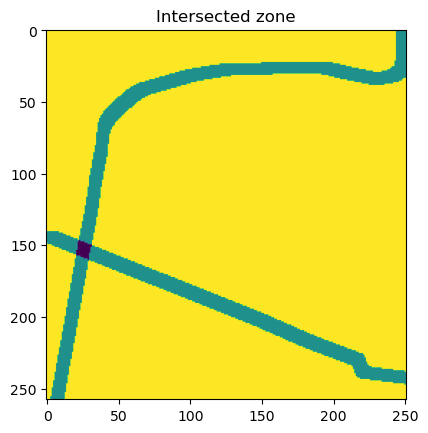

In [203]:
fig, ax = plt.subplots()
ax.imshow(buff_intersect)
ax.set_title('Intersected zone')


# End ^^